In [1]:
#IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('sonar .csv',names=range(0,61)) # CREATE A DATAFRAME FROM THE GIVEN CSV
df.head() # LETS SEE THE FIRST 5 ROWS OF DATA

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
# Lets check the shape of data
df.shape

(208, 61)

In [6]:
# Lets check the data types
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

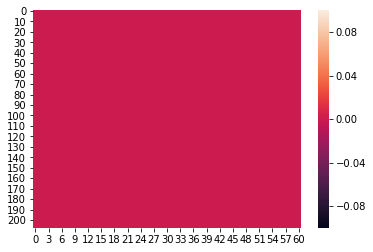

In [3]:
#Lets check the missing values
sns.heatmap(df.isnull())

In [4]:
#Lets confirm the missing values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
#Lets remove the outliers
from scipy.stats import zscore
z_score=abs(zscore(df.iloc[:,0:-1]))


In [8]:
dfn=df.loc[(z_score<3).all(axis=1)]

In [9]:
print('the shape before removal of outlier is',df.shape)
print('the shape after removal of outlier is',dfn.shape)

the shape before removal of outlier is (208, 61)
the shape after removal of outlier is (168, 61)


In [10]:
dfn.describe() # Lets do the descriptive statistics

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.023518,0.030290,0.035176,0.043747,0.066641,0.095901,0.110491,0.115680,0.155424,0.185860,...,0.013826,0.011507,0.009385,0.009588,0.007992,0.007257,0.006888,0.006327,0.006610,0.005667
std,0.014052,0.021525,0.025846,0.027553,0.041237,0.049633,0.047619,0.060332,0.084019,0.103403,...,0.008398,0.006988,0.005942,0.006043,0.005489,0.004246,0.004610,0.004381,0.004637,0.003622
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005700,0.011700,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013000,0.013975,0.016875,0.023500,0.035775,0.063500,0.079325,0.073275,0.094700,0.104275,...,0.007500,0.006475,0.004750,0.004775,0.003800,0.004175,0.003700,0.003275,0.003275,0.003000
50%,0.020850,0.026800,0.029100,0.039400,0.059650,0.085450,0.102350,0.107450,0.142350,0.177200,...,0.012950,0.009700,0.007900,0.008450,0.006850,0.006450,0.005600,0.005150,0.005650,0.004950
75%,0.030850,0.042025,0.047450,0.056675,0.090525,0.123050,0.140275,0.149125,0.197625,0.252950,...,0.018725,0.014925,0.012725,0.013025,0.010650,0.009700,0.009275,0.008775,0.008350,0.007550
max,0.076200,0.121000,0.152600,0.149800,0.225200,0.261100,0.230400,0.348100,0.527600,0.596500,...,0.042600,0.038600,0.026500,0.027100,0.029000,0.019800,0.024200,0.024400,0.024600,0.019800


In [11]:
# Lets check the correlation among the variables
dfn.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.606951,0.494378,0.297647,0.238952,0.223495,0.190309,0.267078,0.225463,0.281091,...,0.090864,0.032960,0.102006,0.052542,0.183766,0.249330,0.259425,0.218116,0.271661,0.280020
1,0.606951,1.000000,0.705483,0.422593,0.286709,0.272142,0.174825,0.215852,0.222288,0.267577,...,0.186279,0.178945,0.247151,0.239576,0.333562,0.313411,0.289292,0.273874,0.286762,0.325590
2,0.494378,0.705483,1.000000,0.589044,0.363675,0.254874,0.134300,0.284794,0.275083,0.293852,...,0.171146,0.232363,0.254387,0.203008,0.230790,0.350302,0.389202,0.241480,0.299664,0.320494
3,0.297647,0.422593,0.589044,1.000000,0.576257,0.301838,0.221596,0.304434,0.153422,0.187116,...,0.144407,0.253167,0.260006,0.157887,0.113845,0.323666,0.258770,0.278005,0.367215,0.279193
4,0.238952,0.286709,0.363675,0.576257,1.000000,0.606775,0.303244,0.238835,0.214797,0.252862,...,0.179501,0.260969,0.291406,0.132799,0.097434,0.135541,0.063082,0.147854,0.210557,0.131323
5,0.223495,0.272142,0.254874,0.301838,0.606775,1.000000,0.684429,0.462791,0.327517,0.342504,...,0.165651,0.174064,0.149197,0.163959,0.100597,0.144546,0.105796,0.145701,0.163716,0.167355
6,0.190309,0.174825,0.134300,0.221596,0.303244,0.684429,1.000000,0.647280,0.394312,0.328827,...,0.177628,0.110453,-0.029412,0.162504,0.097458,0.132871,0.099336,0.090756,0.181637,0.173110
7,0.267078,0.215852,0.284794,0.304434,0.238835,0.462791,0.647280,1.000000,0.720203,0.581344,...,0.239475,0.130856,-0.034272,0.107988,0.098051,0.133920,0.201206,0.168416,0.177884,0.173271
8,0.225463,0.222288,0.275083,0.153422,0.214797,0.327517,0.394312,0.720203,1.000000,0.850205,...,0.220663,0.124609,-0.107105,0.068444,-0.002977,0.030870,0.000433,0.085625,0.013843,0.011882
9,0.281091,0.267577,0.293852,0.187116,0.252862,0.342504,0.328827,0.581344,0.850205,1.000000,...,0.276210,0.207029,-0.073559,0.031101,0.014921,0.003126,-0.031057,0.075941,0.067199,0.096421


In [12]:
# Lets check the skewness
dfn.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
5     0.863454
6     0.346430
7     0.945236
8     0.956368
9     0.763364
10    0.758853
11    0.477091
12    0.690740
13    0.721121
14    0.716783
15    0.783513
16    0.675321
17    0.549661
18    0.251887
19   -0.082001
20   -0.280993
21   -0.503579
22   -0.631948
23   -0.676276
24   -1.062888
25   -1.046461
26   -0.955375
27   -0.862214
28   -0.576772
29   -0.128444
30    0.256391
31    0.346410
32    0.548229
33    0.687875
34    0.802276
35    0.792208
36    0.808269
37    0.896261
38    0.678321
39    0.719920
40    0.921628
41    0.684853
42    0.675759
43    1.221813
44    1.473023
45    0.991893
46    1.126371
47    0.873927
48    0.929468
49    0.913654
50    0.765023
51    1.254590
52    0.909089
53    0.843380
54    1.281404
55    0.764119
56    1.378156
57    1.364882
58    1.464334
59    1.144572
dtype: float64

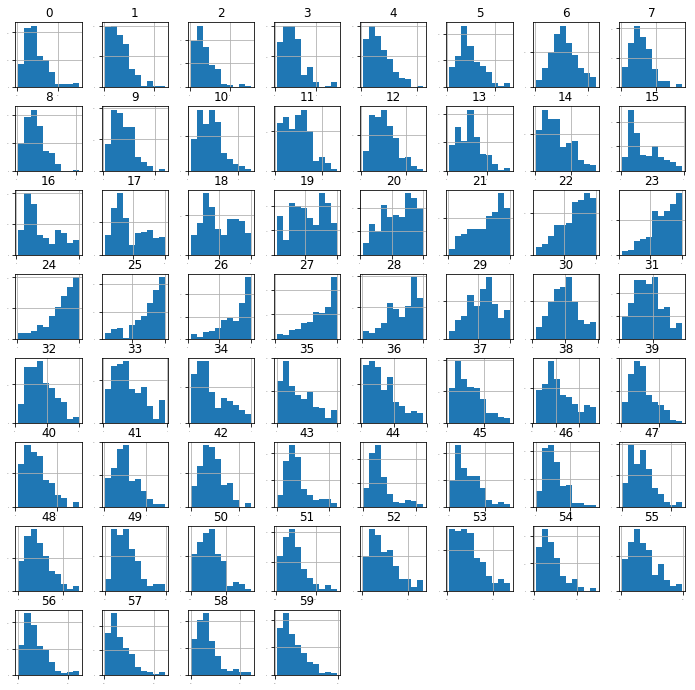

In [13]:
dfn.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [14]:
# Lets seprate the target and features to easy removal of skewness
dfx = dfn.drop([60],axis=1)
target = dfn[60]


In [15]:
dfx.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053


In [16]:
target.head()

0    R
1    R
4    R
6    R
7    R
Name: 60, dtype: object

In [17]:
target.value_counts()

R    84
M    84
Name: 60, dtype: int64

In [18]:
#removing the skewness
for col in dfx.columns:
    if dfx.skew().loc[col]>0.55:
        dfx[col]=np.sqrt(dfx[col])

In [19]:
dfx.skew()

0     0.372090
1     0.281334
2     0.482336
3     0.263262
4     0.190869
5     0.058182
6     0.346430
7    -0.072021
8     0.164431
9    -0.024306
10    0.091532
11    0.477091
12    0.012747
13    0.049090
14    0.042767
15    0.318747
16    0.281597
17    0.549661
18    0.251887
19   -0.082001
20   -0.280993
21   -0.503579
22   -0.631948
23   -0.676276
24   -1.062888
25   -1.046461
26   -0.955375
27   -0.862214
28   -0.576772
29   -0.128444
30    0.256391
31    0.346410
32    0.548229
33    0.090209
34    0.252099
35    0.202090
36    0.224796
37    0.277811
38    0.155282
39   -0.028574
40    0.201612
41   -0.120035
42   -0.230328
43    0.344360
44    0.479419
45    0.100931
46    0.189477
47   -0.080463
48    0.101095
49    0.021241
50   -0.104436
51    0.385572
52    0.243354
53    0.158895
54    0.467552
55    0.080495
56    0.500071
57    0.471270
58    0.359668
59    0.447901
dtype: float64

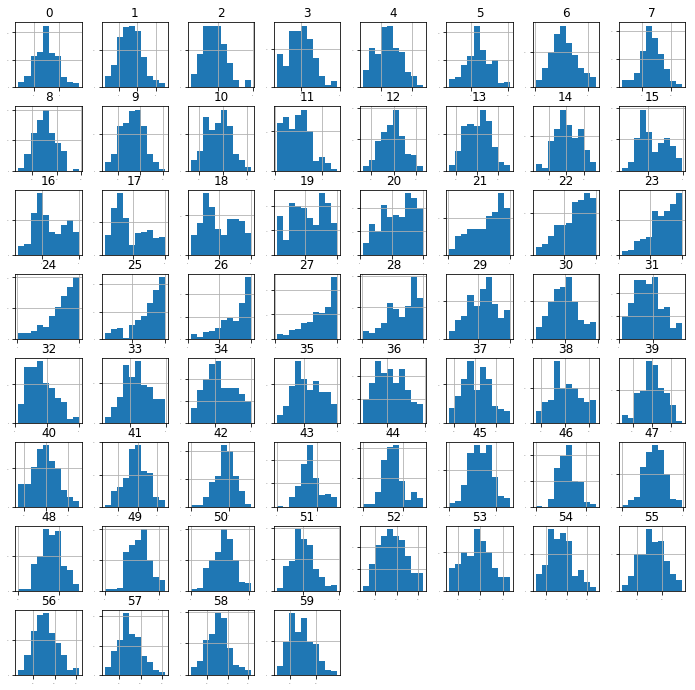

In [20]:
dfx.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [21]:
#Lets scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dfx)
x=pd.DataFrame(x,columns=dfx.columns)

In [22]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.122016,0.485870,0.475741,-0.850241,0.794457,0.186177,0.914312,0.798530,1.678029,0.376213,...,1.094982,-1.608895,-0.372738,1.070415,0.014071,1.896028,2.102798,0.630582,0.667285,-0.651489
1,1.490889,1.079405,1.754067,0.982706,1.234445,2.594158,2.213885,2.896502,1.867508,0.998661,...,0.007466,-0.346813,0.077930,-0.759849,0.426175,2.251507,1.502272,-0.193121,-0.159149,-0.229399
2,2.918352,1.562708,0.666204,-0.006199,-0.032992,-0.548414,0.219241,1.865488,2.049828,2.072086,...,0.359033,-1.490728,-0.607247,0.309302,0.696147,-1.688706,0.233603,-0.220435,0.978595,1.094333
3,0.705107,2.403742,2.873841,2.724975,2.052211,1.419950,-0.787559,0.513176,0.723398,1.461056,...,0.754783,1.247022,2.152352,0.695428,-0.026347,1.430399,0.652988,1.693184,-0.598962,1.290392
4,1.829154,1.168276,1.751428,-0.313541,1.188617,0.057713,-0.164102,-0.886882,0.028587,0.972758,...,-1.058046,-0.399329,0.577467,-0.830723,0.870484,0.678392,0.511933,-0.248035,-0.261884,0.050235


In [23]:
# check the skewness again
x.skew()

0     0.372090
1     0.281334
2     0.482336
3     0.263262
4     0.190869
5     0.058182
6     0.346430
7    -0.072021
8     0.164431
9    -0.024306
10    0.091532
11    0.477091
12    0.012747
13    0.049090
14    0.042767
15    0.318747
16    0.281597
17    0.549661
18    0.251887
19   -0.082001
20   -0.280993
21   -0.503579
22   -0.631948
23   -0.676276
24   -1.062888
25   -1.046461
26   -0.955375
27   -0.862214
28   -0.576772
29   -0.128444
30    0.256391
31    0.346410
32    0.548229
33    0.090209
34    0.252099
35    0.202090
36    0.224796
37    0.277811
38    0.155282
39   -0.028574
40    0.201612
41   -0.120035
42   -0.230328
43    0.344360
44    0.479419
45    0.100931
46    0.189477
47   -0.080463
48    0.101095
49    0.021241
50   -0.104436
51    0.385572
52    0.243354
53    0.158895
54    0.467552
55    0.080495
56    0.500071
57    0.471270
58    0.359668
59    0.447901
dtype: float64

In [24]:
# as it has 60 features lets bring them down with variance coverage to 95%
from sklearn.decomposition import PCA
principalcomp = PCA(0.95)
principalcomp.fit(x,target)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
principalcomp.explained_variance_ratio_

array([0.19900048, 0.13225555, 0.10882098, 0.06059054, 0.04802302,
       0.03724268, 0.03319031, 0.02783277, 0.02714732, 0.02309117,
       0.02121897, 0.02023741, 0.01782641, 0.01731866, 0.01679434,
       0.01413752, 0.01399339, 0.01342924, 0.01304514, 0.01222488,
       0.01092666, 0.01042694, 0.0098155 , 0.00915288, 0.00847133,
       0.00828461, 0.00738407, 0.00725092, 0.00663886, 0.00611291,
       0.00567207, 0.00539064])

In [26]:
finaltarget = principalcomp.transform(x)

In [27]:
xa =pd.DataFrame(finaltarget, columns=range(0,32))

In [28]:
xa.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.147639,3.232554,0.383573,-0.668221,1.235690,-0.856111,0.539508,1.000980,-0.507371,0.860606,...,-0.515369,-0.009147,-0.093630,0.365999,-1.408016,-1.464566,-1.991041,-0.932599,-0.804258,-0.395689
1,7.721144,2.327794,1.175037,4.322637,1.105903,3.017981,1.060566,-0.356609,2.015242,-0.995978,...,0.242274,-0.085832,-1.020415,-0.624949,-0.317108,1.156135,-0.356090,0.573014,0.246987,0.223539
2,2.430766,1.184679,0.896517,4.342907,1.715582,1.794249,2.821585,1.661976,0.478721,0.053728,...,-0.164315,2.042044,-0.143450,-0.200294,0.015891,-0.606309,-0.513774,-0.059981,0.337229,0.539135
3,2.972647,3.830276,1.838214,0.134633,1.237650,-2.839662,-1.214000,-2.069826,-0.317781,3.154914,...,-0.889630,0.850057,1.352846,0.031639,1.808865,1.697519,0.788065,-0.047714,0.298260,-0.125737
4,3.134312,-0.141352,0.259186,-0.569101,-0.031470,-1.979095,3.020318,0.359869,0.997751,0.187749,...,0.843244,0.207918,0.668127,0.627579,0.212881,0.206073,-1.171870,-0.079895,-0.368183,-0.494399


In [29]:
xa.skew()

0     0.157581
1     0.257696
2     0.050324
3     0.232994
4     0.173371
5     0.328556
6     0.333169
7     0.023380
8     0.019279
9     0.484260
10    0.583462
11    0.237688
12    0.147335
13    0.385584
14   -0.053933
15    0.063550
16    0.060852
17    0.213794
18   -0.015336
19    0.008159
20    0.096927
21   -0.057069
22   -0.063475
23    0.247618
24    0.190427
25    0.362730
26    0.333920
27    0.023888
28    0.270023
29    0.182758
30    0.303313
31    0.103287
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009B89BB95C0>,
      dtype=object)

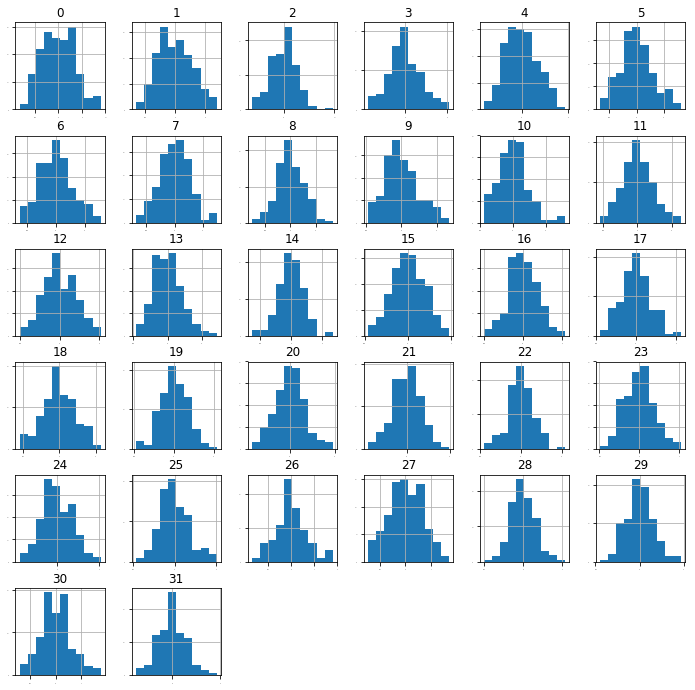

In [30]:
xa.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,   figsize=(12,12))


In [31]:
#Let us import the required libraries and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Let us create a list of models to be evaluated
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('rf', RandomForestClassifier(random_state=10)))

In [33]:
import warnings
warnings.filterwarnings('ignore')


In [34]:
# Let us check the performance of models
results = []
names = []
for name, model in models:
        cv_results = cross_val_score(model, xa, target, cv=5, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        

LR: 0.708456 (0.119220)
KNN: 0.665441 (0.098705)
DT: 0.665809 (0.119292)
NB: 0.673529 (0.051281)
SVM: 0.665809 (0.165467)
rf: 0.719118 (0.117316)


In [35]:
# Random forest if performing best so lets find best random state for it
rf=RandomForestClassifier(random_state=5)                        
max_accuracy=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(xa,target,test_size=0.2, random_state=i)
    rf.fit(X_train,y_train)
    ypred=rf.predict(X_test)
    accuracy=accuracy_score(y_test, ypred)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)

At random state  1 the value of accuracy is  0.8235294117647058
At random state  2 the value of accuracy is  0.7647058823529411
At random state  3 the value of accuracy is  0.7058823529411765
At random state  4 the value of accuracy is  0.5294117647058824
At random state  5 the value of accuracy is  0.6764705882352942
At random state  6 the value of accuracy is  0.7647058823529411
At random state  7 the value of accuracy is  0.8529411764705882
At random state  8 the value of accuracy is  0.6764705882352942
At random state  9 the value of accuracy is  0.6764705882352942
At random state  10 the value of accuracy is  0.8529411764705882
At random state  11 the value of accuracy is  0.7941176470588235
At random state  12 the value of accuracy is  0.7058823529411765
At random state  13 the value of accuracy is  0.8235294117647058
At random state  14 the value of accuracy is  0.8529411764705882
At random state  15 the value of accuracy is  0.7352941176470589
At random state  16 the value of a

In [37]:
# maximum accuracy we are achieving is 94.11 lets see if we can improve it by using best parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
model = RandomForestClassifier(random_state=5)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_result= rf_random.fit(xa, target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


In [38]:
rf_result.best_score # the cross val score has been improved

0.75

In [39]:
rf_result.best_params_  # these are the best parameters

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [41]:
# Lets buid our final model using best random state and best paramters
X_train, X_test, y_train,y_test = train_test_split(xa,target,test_size =0.2, random_state = 45)
rfa=RandomForestClassifier(random_state=5, n_estimators=1000,min_samples_split= 5,min_samples_leaf= 4,max_features='auto',max_depth= None,bootstrap= True)
rfa.fit(X_train, y_train)
y_pred = rfa.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy  #  we can see accuracy has been improved

0.9705882352941176

In [42]:
# lets print confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print('confusion matrix = ',confusion_matrix(y_test,y_pred))
print('classification report = ',classification_report(y_test,y_pred))

confusion matrix =  [[18  0]
 [ 1 15]]
classification report =                precision    recall  f1-score   support

           M       0.95      1.00      0.97        18
           R       1.00      0.94      0.97        16

   micro avg       0.97      0.97      0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [43]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(rfa,'rfa_SONAR.pkl')

['rfa_SONAR.pkl']